# Titanic Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
df.shape

(891, 12)

In [46]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [47]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0,NaN,S


# summary Statistics

In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

observation:
    1. sex,cabin and embarked have null values

<AxesSubplot:>

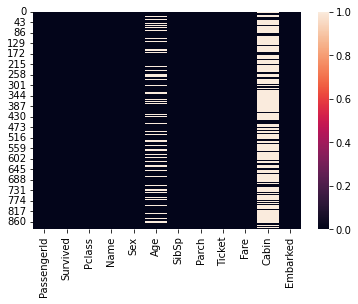

In [52]:
sns.heatmap(df.isnull())

# correlation

In [53]:
dfcor=df.corr()
dfcor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

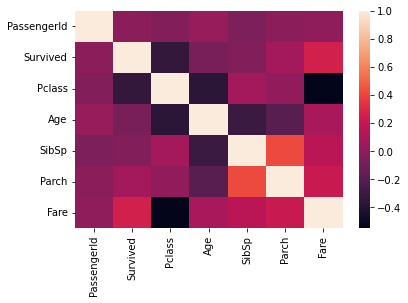

In [54]:
sns.heatmap(dfcor)

<AxesSubplot:>

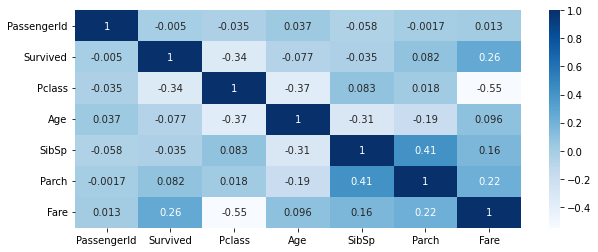

In [55]:
plt.figure(figsize=(10,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [56]:
Observation:
    1.Pclass has negative correlation with fare


SyntaxError: invalid syntax (Temp/ipykernel_10892/3843362157.py, line 1)

In [57]:
Age1 = df.loc[df.Pclass == 1].Age.mean()
Age2 = df.loc[df.Pclass == 2].Age.mean()
Age3 = df.loc[df.Pclass == 3].Age.mean()

In [58]:
t= df.loc[df.Pclass == 1]
t2= df.loc[df.Pclass == 2]
t3= df.loc[df.Pclass == 3]
t.Age.fillna(Age1, inplace = True)
t2.Age.fillna(Age2, inplace = True)
t3.Age.fillna(Age3, inplace = True)
print( t.isna().sum(),"\n\n",t2.isna().sum(),"\n\n",t3.isna().sum())

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          40
Embarked        2
dtype: int64 

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          168
Embarked         0
dtype: int64 

 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         0
dtype: int64


In [59]:
df=t.append(t2.append(t3),ignore_index=True)

In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
from sklearn.utils import shuffle
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S
3,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00000,0,0,113783,26.5500,C103,S
4,24,1,1,"Sloper, Mr. William Thompson",male,28.00000,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.00000,0,0,7552,10.5167,NaN,S
887,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00000,0,0,SOTON/OQ 392076,7.0500,NaN,S
888,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00000,0,5,382652,29.1250,NaN,Q
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S


In [62]:
df=shuffle(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,879,0,3,"Laleff, Mr. Kristo",male,25.14062,0,0,349217,7.8958,NaN,S
514,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.00000,4,2,347077,31.3875,NaN,S
240,136,0,2,"Richard, Mr. Emile",male,23.00000,0,0,SC/PARIS 2133,15.0458,NaN,C
262,235,0,2,"Leyson, Mr. Robert William Norman",male,24.00000,0,0,C.A. 29566,10.5000,NaN,S
811,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.00000,0,0,363294,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
813,762,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,41.00000,0,0,SOTON/O2 3101272,7.1250,NaN,S
663,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.00000,0,0,7553,9.8375,NaN,S
827,784,0,3,"Johnston, Mr. Andrew G",male,25.14062,1,2,W./C. 6607,23.4500,NaN,S
121,516,0,1,"Walker, Mr. William Anderson",male,47.00000,0,0,36967,34.0208,D46,S


In [63]:
df.Embarked.mode()

0    S
dtype: object

In [64]:
df.Embarked.fillna('s',inplace=True)

In [65]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df.Embarked=df.Embarked.astype('str')
df.Embarked=LE.fit_transform(df.Embarked)
df.Sex = LE.fit_transform(df.Sex)

In [67]:
df.drop(["PassengerId","Name","Cabin","Ticket"], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
884,0,3,1,25.14062,0,0,7.8958,2
514,0,3,1,9.00000,4,2,31.3875,2
240,0,2,1,23.00000,0,0,15.0458,0
262,0,2,1,24.00000,0,0,10.5000,2
811,0,3,1,34.00000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
813,0,3,1,41.00000,0,0,7.1250,2
663,0,3,0,22.00000,0,0,9.8375,2
827,0,3,1,25.14062,1,2,23.4500,2
121,0,1,1,47.00000,0,0,34.0208,2


In [69]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.292875,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,13.210527,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


Above observaation shows there is no null value and Replacing Null values in Age didnt have much effect in mean of age

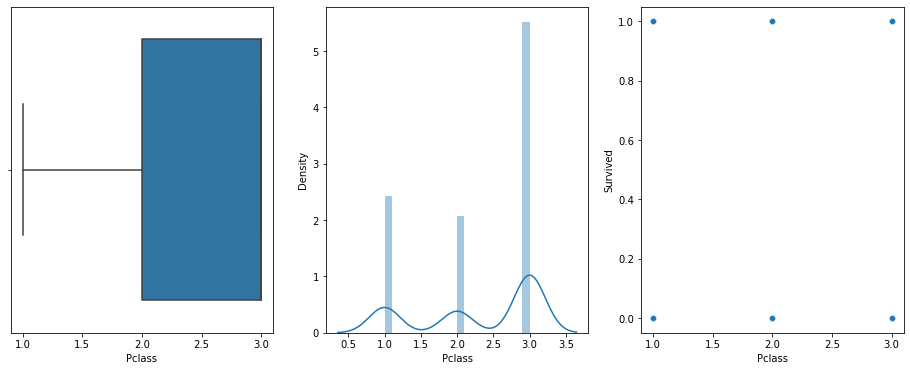

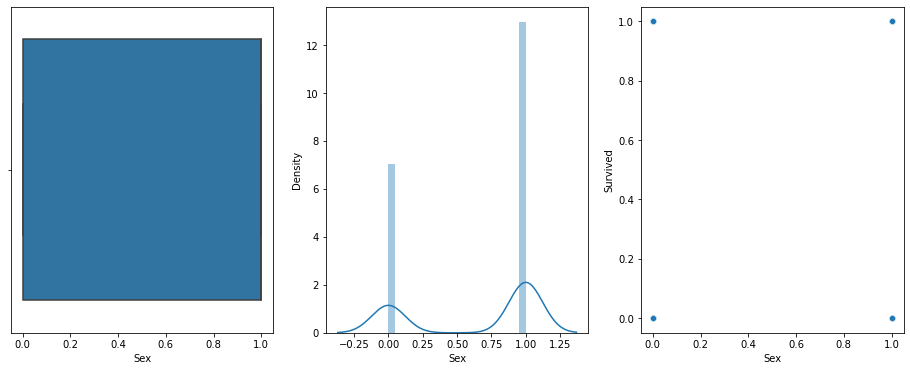

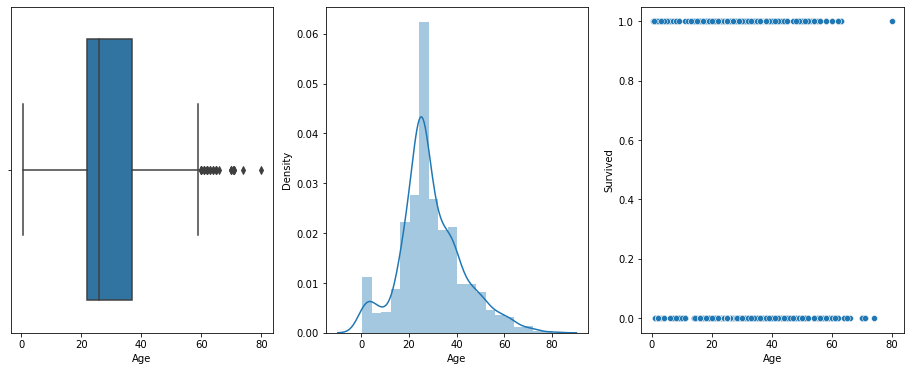

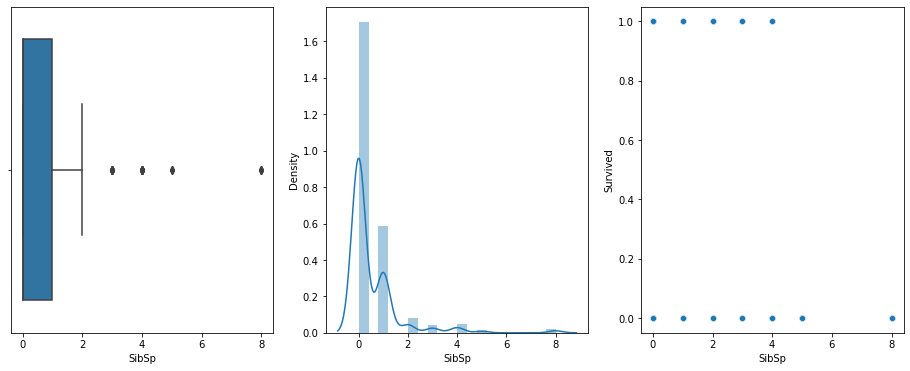

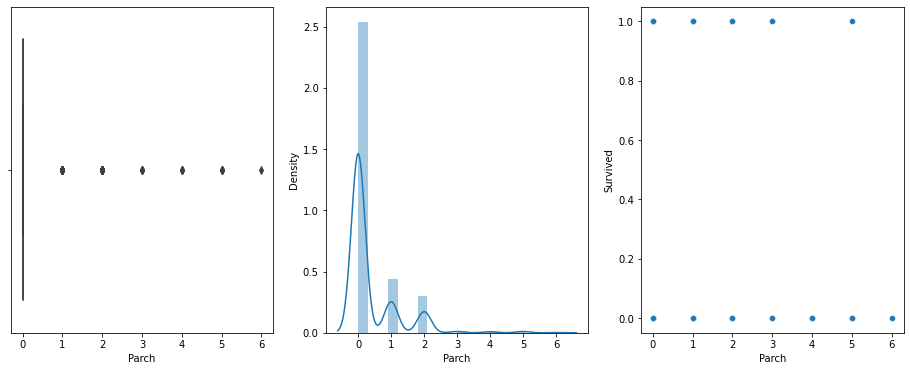

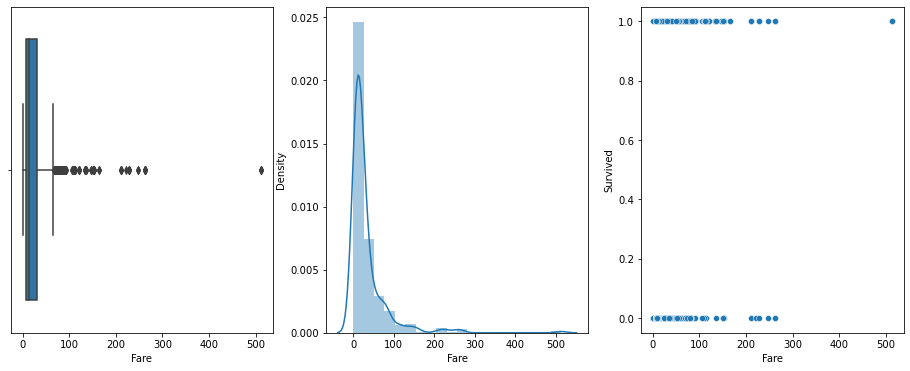

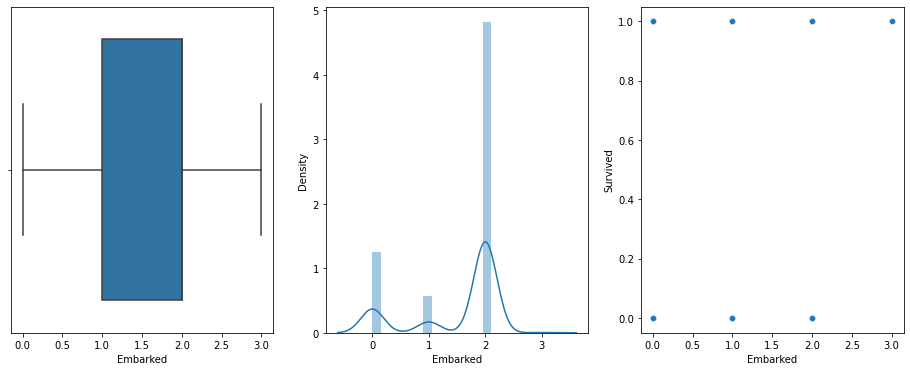

In [73]:
target_variable = "Survived"
feature_variable = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(16, 6))
    sns.boxplot(x=df[feature_name], ax=axs[0])
    sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1])
    sns.scatterplot(data=df, x=feature_name, y=target_variable, ax=axs[2])
    plt.show()
    
for i in feature_variable:
    num_plots(i)   

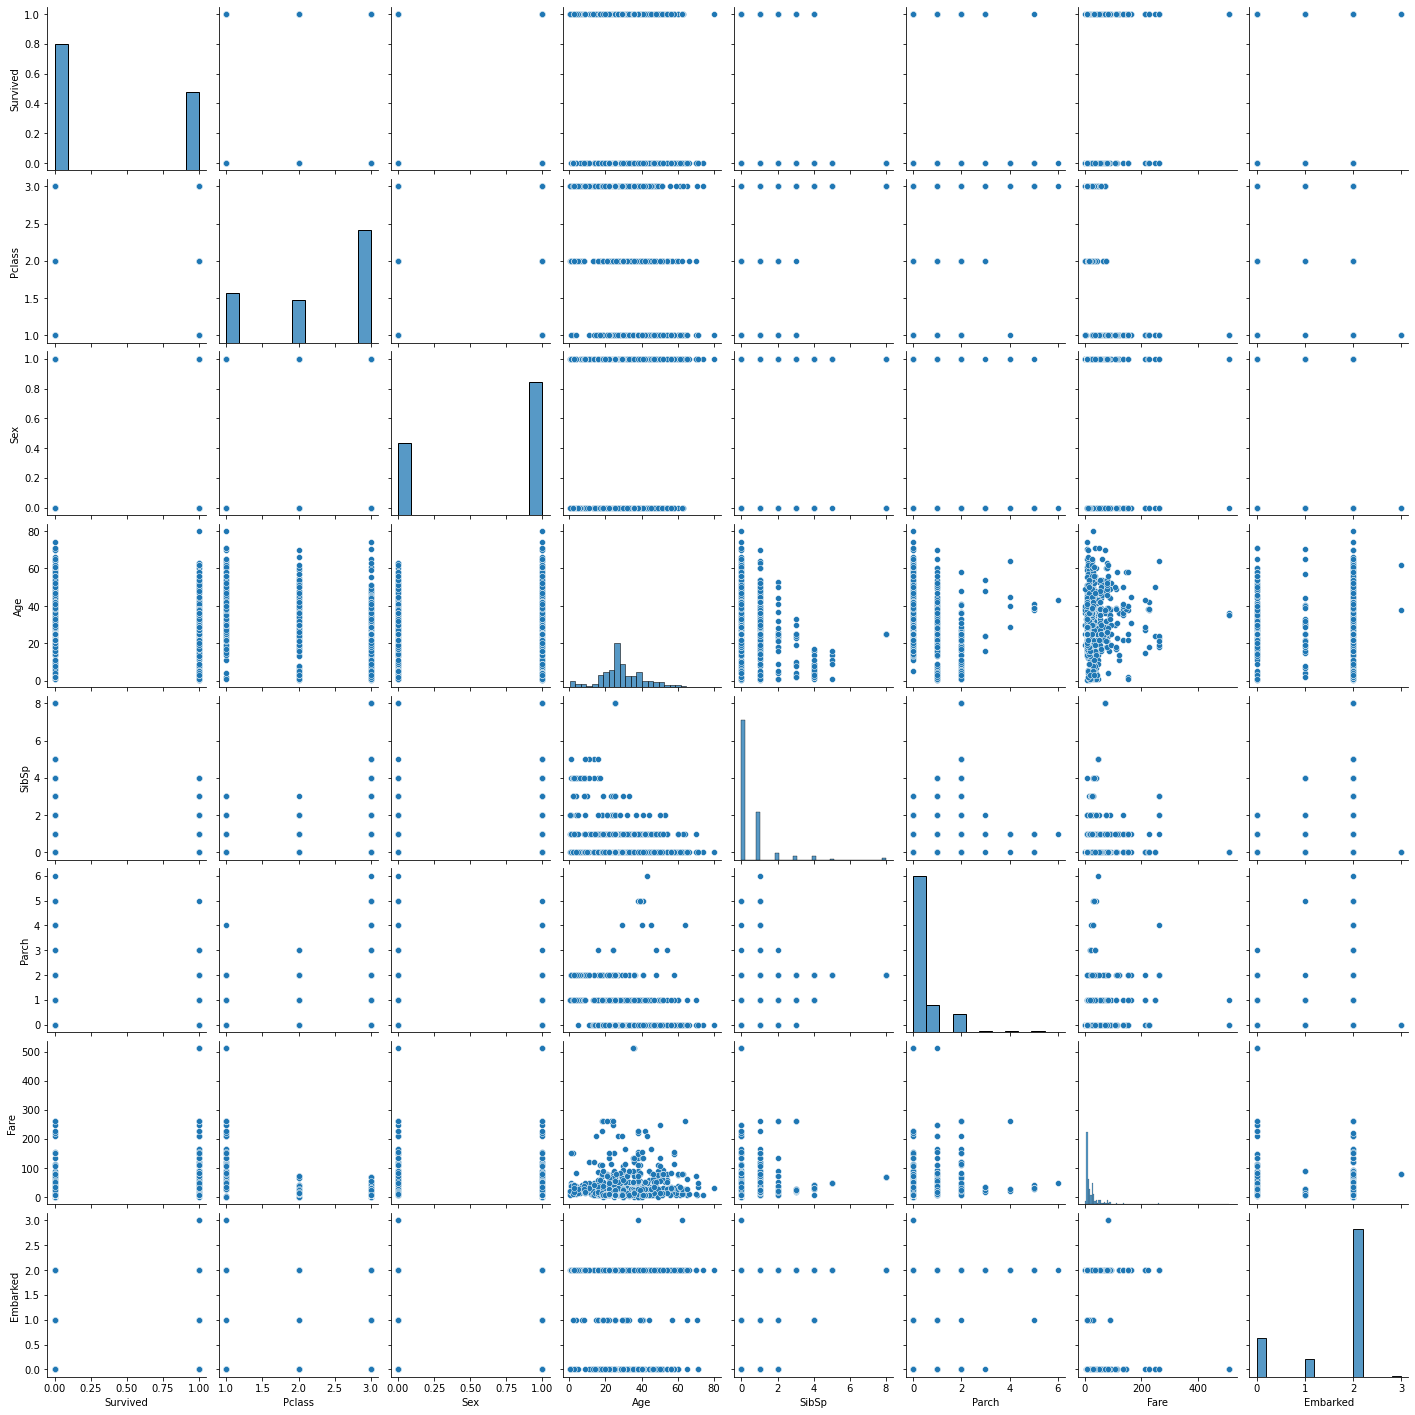

In [71]:
sns.pairplot(df)

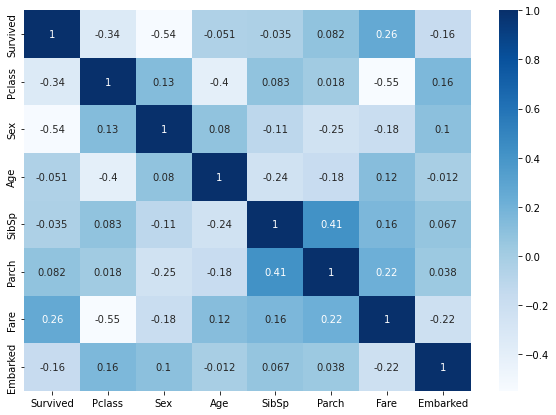

In [74]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

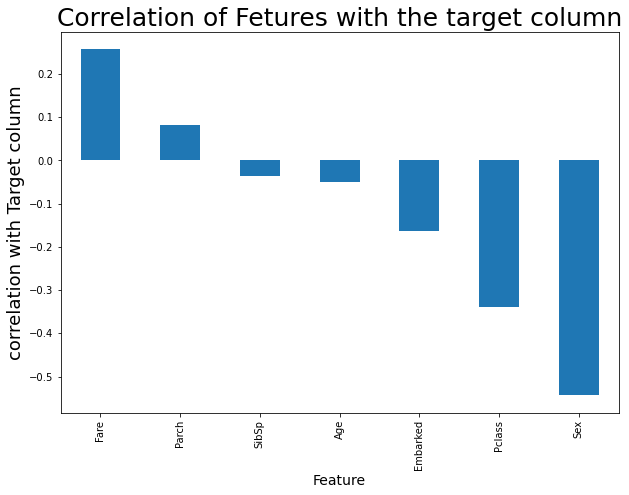

In [77]:
plt.figure(figsize=(10,7))
df.corr()["Survived"].sort_values(ascending=False).drop(["Survived"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

The above two observation shows that the Target Variable "Survived" have high negative correlation with Sex which actually means the survival rate of female gender is higher than the male as per the incident.

In [78]:
import itertools

cols = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
length = len(cols)
cs = ["b","r","g","c","m","k","lime"]

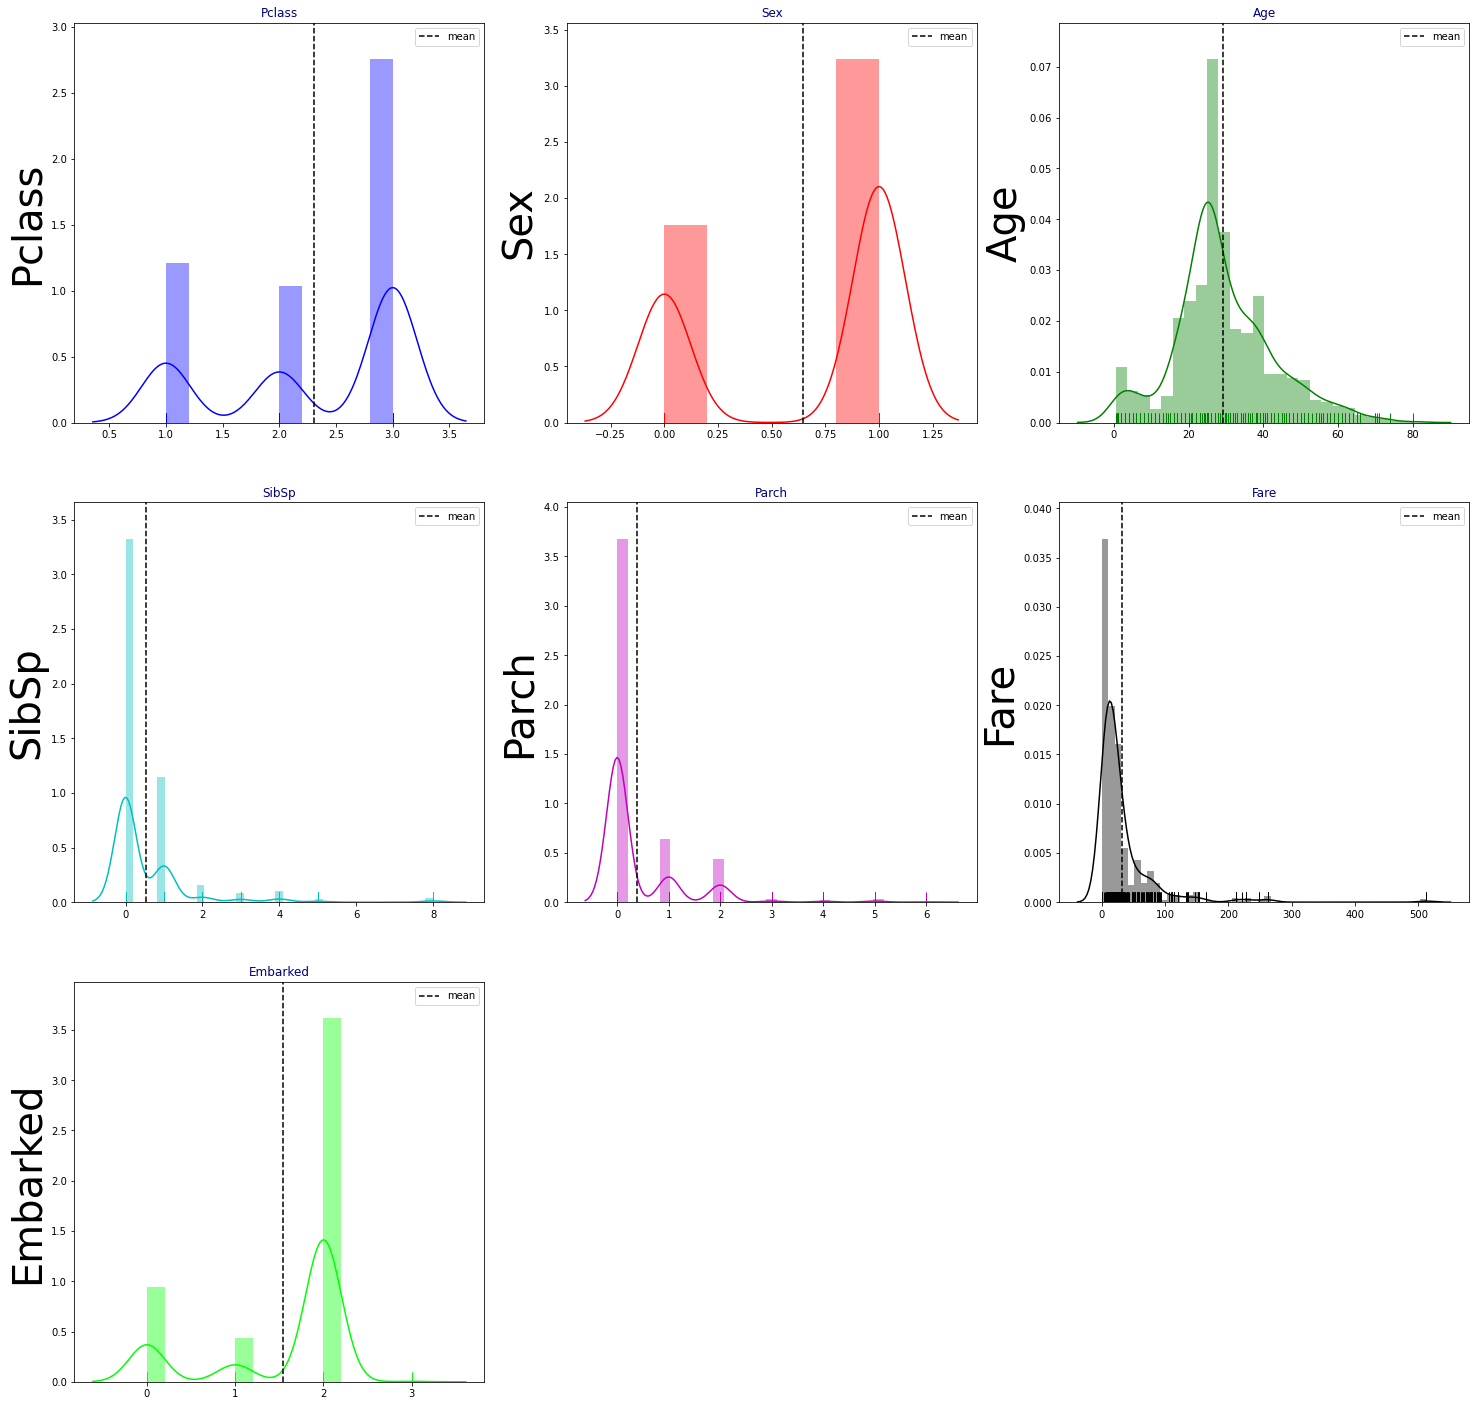

In [82]:
plt.figure(figsize=(25,25))
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,3,j+1)
    ax= sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(), linestyle="dashed", label= "mean", color= "k")
    plt.legend(loc="best")
    plt.title(i,color = "navy")
    plt.xlabel("")
    plt.ylabel(i,fontsize = 40)

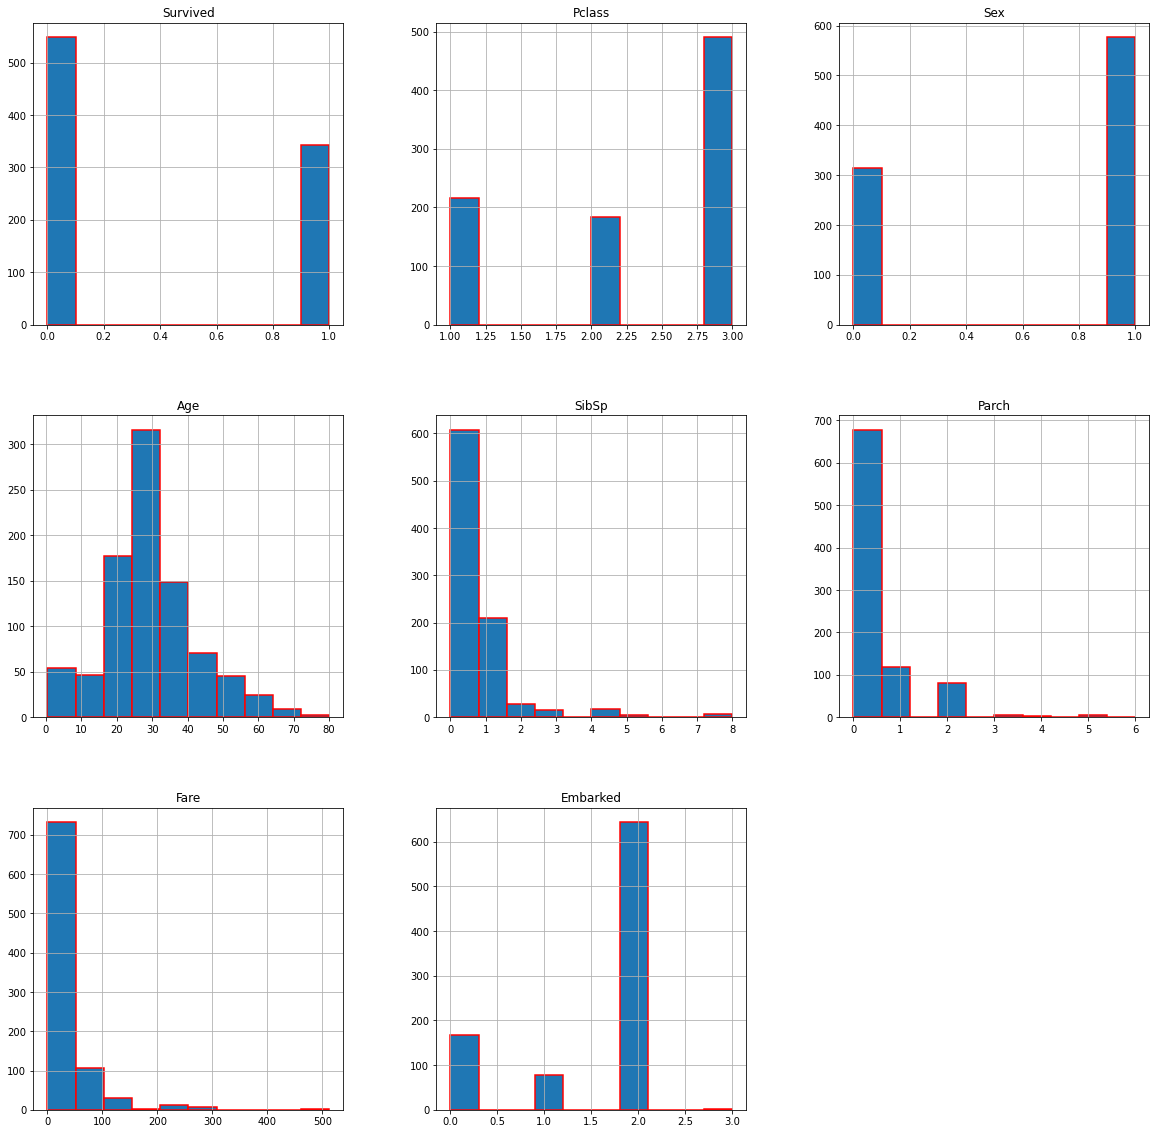

In [84]:
df.hist(edgecolor="red",linewidth= 1.5, figsize= (20,20))
plt.show()

In [85]:
x = df.drop(["Survived"], axis = 1)
y = df.Survived

# Scaling

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledX= sc.fit_transform(x)

In [88]:
scaledX

array([[ 0.82737724,  0.73769513, -0.31449064, ..., -0.47367361,
        -0.48944219,  0.58111394],
       [ 0.82737724,  0.73769513, -1.53697665, ...,  2.00893337,
        -0.01644416,  0.58111394],
       [-0.36936484,  0.73769513, -0.47662057, ..., -0.47367361,
        -0.34547918, -1.93846038],
       ...,
       [ 0.82737724,  0.73769513, -0.31449064, ...,  2.00893337,
        -0.17626324,  0.58111394],
       [-1.56610693,  0.73769513,  1.3411327 , ..., -0.47367361,
         0.03657651,  0.58111394],
       [ 0.82737724,  0.73769513, -0.31449064, ..., -0.47367361,
        -0.48944219,  0.58111394]])

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [93]:
accu = 0
for i in range(0,20000):
    x_train, x_test, y_train, y_test = train_test_split(scaledX,y,test_size = .25, random_state = i)
    mod = LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc> accu:
        accu= acc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")  

Best Accuracy 89.23766816143498 found on randomstate 3199


Model Score : 0.7919161676646707
Accuracy Score of  LogisticRegression() is : 0.7982062780269058 


ConfusionMatrix of  LogisticRegression() is :

 [[114  23]
 [ 22  64]] 


classification_report of  LogisticRegression() is :
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       137
           1       0.74      0.74      0.74        86

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223
 


roc_auc_score of LogisticRegression()  is : 0.7881514174163979 




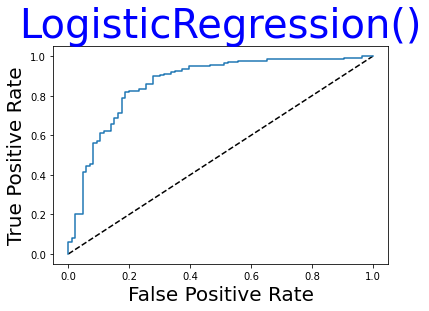





Model Score : 0.7874251497005988
Accuracy Score of  GaussianNB() is : 0.7757847533632287 


ConfusionMatrix of  GaussianNB() is :

 [[107  30]
 [ 20  66]] 


classification_report of  GaussianNB() is :
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       137
           1       0.69      0.77      0.73        86

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223
 


roc_auc_score of GaussianNB()  is : 0.7742318791376677 




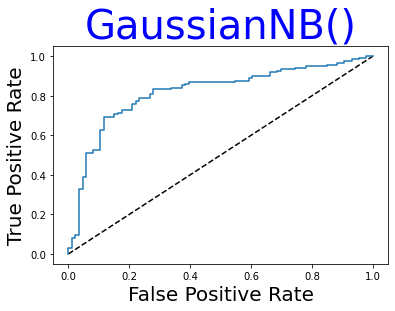

In [94]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

model = [LogisticRegression(), GaussianNB()]

for m in model:
    
    m.fit(x_train,y_train)
    print("Model Score :" ,m.score(x_train,y_train))
    predm = m.predict(x_test)
    print("Accuracy Score of ",m,"is :",accuracy_score(y_test,predm),"\n\n")
    print("ConfusionMatrix of ",m,"is :\n\n",confusion_matrix(y_test,predm),"\n\n")     
    print("classification_report of ",m, "is :\n",classification_report(y_test,predm),"\n\n")
    print("roc_auc_score of",m, " is :", roc_auc_score(y_test,m.predict(x_test)),"\n\n")
    y_pred_prob = m.predict_proba(x_test)[:,0]
    tpr,fpr,threshold = roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label = m)
    plt.xlabel('False Positive Rate',fontsize=20)
    plt.ylabel('True Positive Rate',fontsize=20)
    plt.title(m, fontsize=40, color="b")
    plt.show()      
          
    print('\n\n\n')

In [97]:
model = [ SVC(), DecisionTreeClassifier()]

for m in model:
    
    m.fit(x_train,y_train)
    print("Model Score :" ,m.score(x_train,y_train))
    predm = m.predict(x_test)
    print("Accuracy Score of ",m,"is :",accuracy_score(y_test,predm),"\n\n")
    print("ConfusionMatrix of ",m,"is :\n",confusion_matrix(y_test,predm),"\n\n")     
    print("classification_report of ",m, "is :\n",classification_report(y_test,predm),"\n\n")
    print("roc_auc_score of",m, " is :", roc_auc_score(y_test,m.predict(x_test)),"\n\n")
    print('\n\n\n')

Model Score : 0.8458083832335329
Accuracy Score of  SVC() is : 0.820627802690583 


ConfusionMatrix of  SVC() is :
 [[127  10]
 [ 30  56]] 


classification_report of  SVC() is :
               precision    recall  f1-score   support

           0       0.81      0.93      0.86       137
           1       0.85      0.65      0.74        86

    accuracy                           0.82       223
   macro avg       0.83      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223
 


roc_auc_score of SVC()  is : 0.7890850449838738 






Model Score : 0.9805389221556886
Accuracy Score of  DecisionTreeClassifier() is : 0.8116591928251121 


ConfusionMatrix of  DecisionTreeClassifier() is :
 [[121  16]
 [ 26  60]] 


classification_report of  DecisionTreeClassifier() is :
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       137
           1       0.79      0.70      0.74        86

    accuracy                     

# GRID SEARCH

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
 
parameters = {'n_estimators' : (10,30,50,70,90,100)
              , 'criterion' : ('gini', 'entropy')
              , 'max_depth' : (3,5,7,9,10)
              , 'max_features' : ('auto', 'sqrt')
              , 'min_samples_split' : (2,4,6)
             }
RF_grid  = GridSearchCV(RandomForestClassifier(n_jobs = -1, oob_score= False), param_grid = parameters, cv = 3, verbose = True)

In [101]:
RF_grid_model = RF_grid.fit(x_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


In [102]:
RF_grid_model.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=6,
                       n_estimators=70, n_jobs=-1)

Model Score : 0.9805389221556886
Accuracy Score of  DecisionTreeClassifier() is : 0.8116591928251121 


ConfusionMatrix of  DecisionTreeClassifier() is :

 [[121  16]
 [ 26  60]] 


classification_report of  DecisionTreeClassifier() is :
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       137
           1       0.79      0.70      0.74        86

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223
 


roc_auc_score of DecisionTreeClassifier()  is : 0.790443048718384 




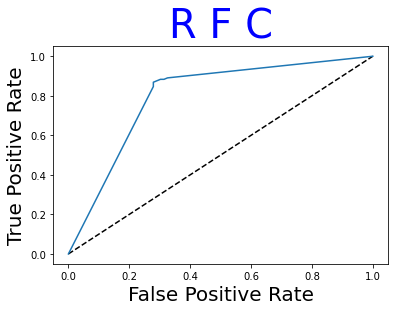

In [103]:
RFC=  RF_grid_model.best_estimator_

RFC.fit(x_train,y_train)
print("Model Score :" ,m.score(x_train,y_train))
predm = m.predict(x_test)
print("Accuracy Score of ",m,"is :",accuracy_score(y_test,predm),"\n\n")
print("ConfusionMatrix of ",m,"is :\n\n",confusion_matrix(y_test,predm),"\n\n")     
print("classification_report of ",m, "is :\n",classification_report(y_test,predm),"\n\n")
print("roc_auc_score of",m, " is :", roc_auc_score(y_test,m.predict(x_test)),"\n\n")
y_pred_prob = m.predict_proba(x_test)[:,0]
tpr,fpr,threshold = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = m)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title("R F C", fontsize=40, color="b")
plt.show() 

# Serialization

From the above its is evident that the RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_split=4, n_estimators=90, n_jobs=-1) is the best Model since it has less difference between the Model Score and Accuracy Score.

In [104]:
import joblib
joblib.dump(RFC,"Titanic_Survied_model.pkl")

['Titanic_Survied_model.pkl']

In [108]:
RFC_from_joblib = joblib.load("Titanic_Survied_model.pkl")
RFC_from_joblib.predict(x_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [109]:
print("Model Score test data :" ,RFC_from_joblib.score(x_test,y_test))

Model Score test data : 0.8071748878923767
